# Libraries

In [82]:
# tensorflow utils
import tensorflow as tf

# matplotlib utils
import matplotlib as mpl
import matplotlib.pyplot as plt

# other utils
import numpy as np
import pandas as pd
import seaborn as sn

# local assets
import layers

# local config
mpl.rcParams['font.family'] = 'monospace'

# Test :: Classic MNIST

## Datasets

In [83]:
( (p_images, p_labels),
  (q_images, q_labels), ) = tf.keras.datasets.mnist.load_data()

# normalize
p_images = p_images / 255.0
q_images = q_images / 255.0

## Model

In [84]:
model = tf.keras.models.load_model('../models/classic_mnist.keras')

## Visualize

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9746 - loss: 0.0890
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9711 - loss: 0.1007
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9437 - loss: 0.1908
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.8359 - loss: 0.5749
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.7009 - loss: 1.3928
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.5789 - loss: 2.6163
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step


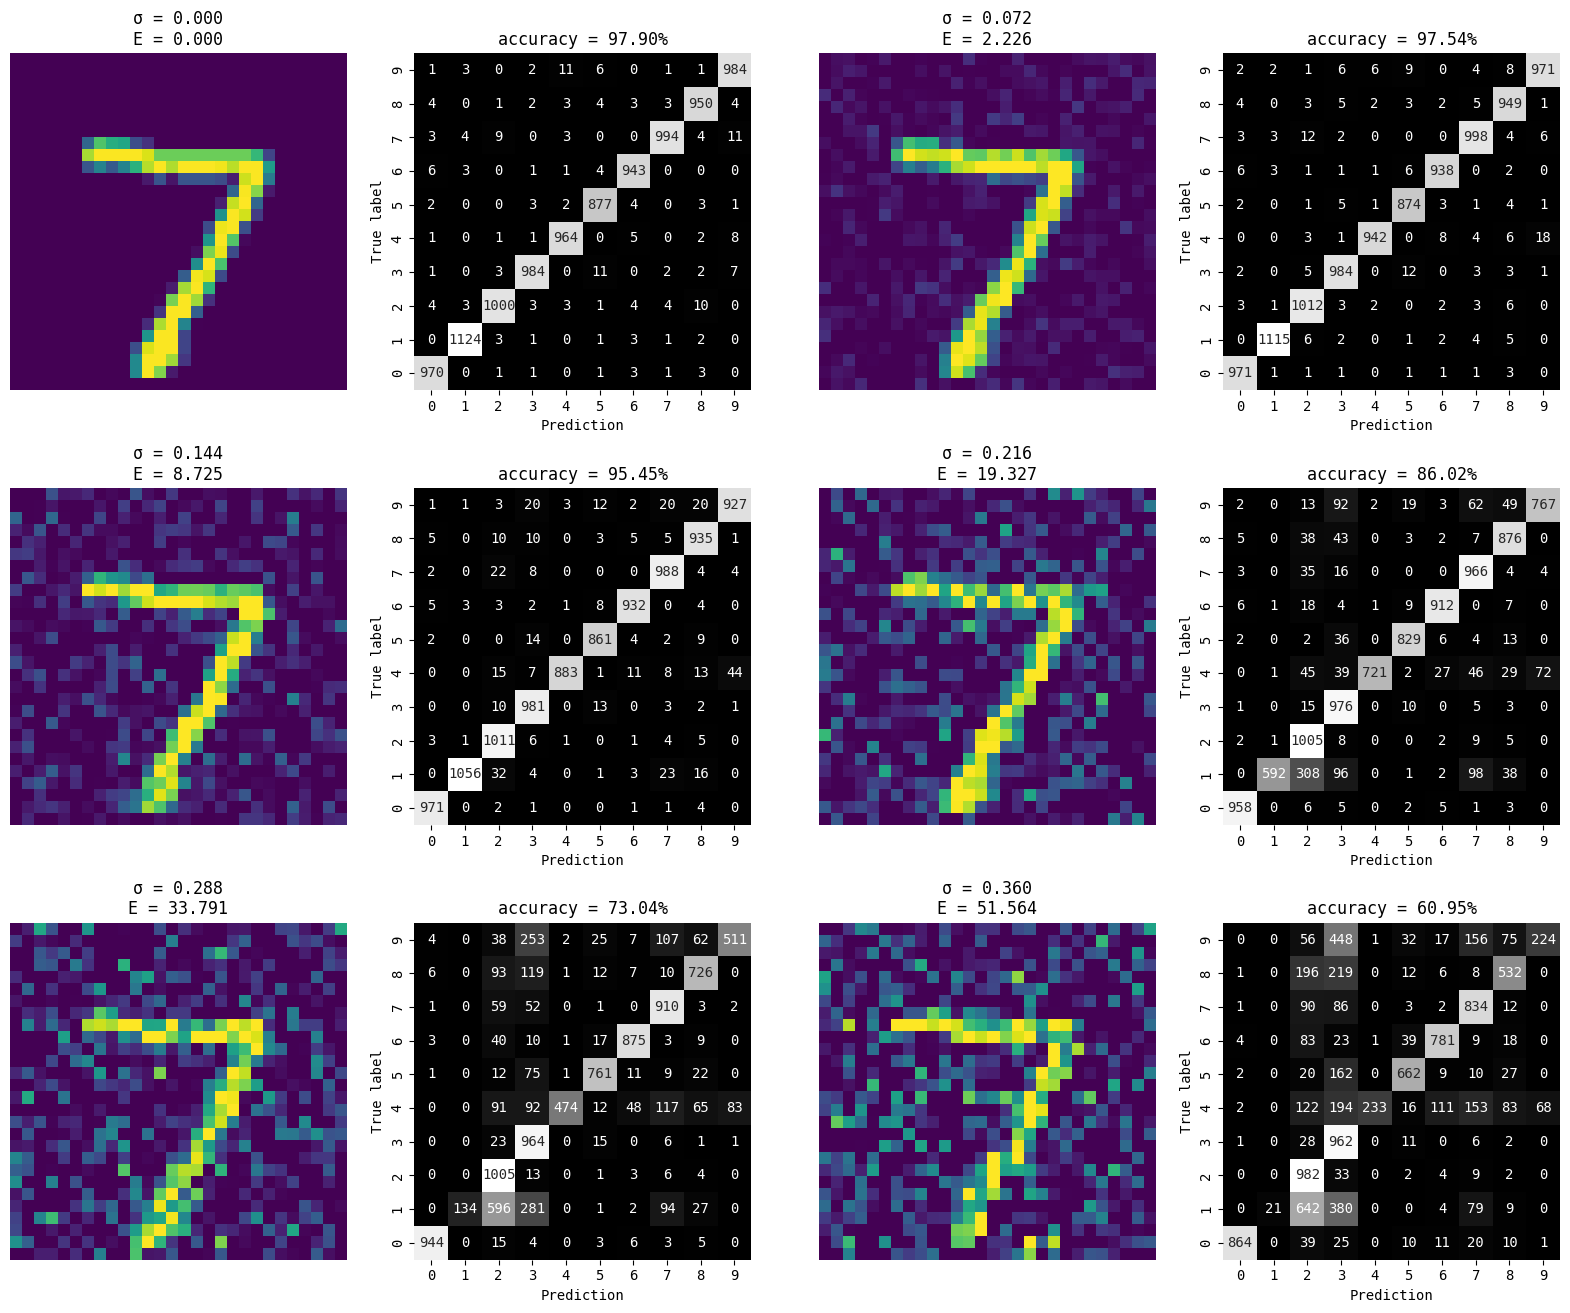

In [85]:
plt.figure(figsize=(20, 16))

noise_x = []
noise_y1 = []
noise_y2 = []

i = 0

for noise_lvl in np.linspace(0, .36, num=6):
    q_noised = layers.NormalNoiseLayer(mean=0, stddev=noise_lvl)(q_images)
    
    # evaluation
    noise_acc = model.evaluate(q_noised, q_labels)[1]
    noise_ene = ((q_images - q_noised) ** 2).numpy().sum() / q_images.shape[0]

    # prediction & confusion
    q_pred = model.predict(q_noised).argmax(-1)
    q_conf = tf.math.confusion_matrix(q_labels, q_pred)
    
    # statistics
    noise_x.append(noise_lvl)
    noise_y1.append(noise_ene)
    noise_y2.append(noise_acc)

    # visualize distorted image
    plt.subplot(3, 4, i + 1)
    plt.axis('off')
    plt.title(f'σ = {noise_lvl:.3f}\nΕ = {noise_ene:.3f}')
    plt.imshow(q_noised[0])

    # visualize confusion matrix
    plt.subplot(3, 4, i + 2)
    sn.heatmap(pd.DataFrame(q_conf), annot=True, cbar=False, cmap='gist_gray', fmt='g', square=True).invert_yaxis()
    plt.title(f'accuracy = {noise_acc:.2%}')
    plt.xlabel('Prediction')
    plt.ylabel('True label')
    
    # increment
    i = i + 2

plt.show()

## Conceive

<Figure size 640x480 with 0 Axes>

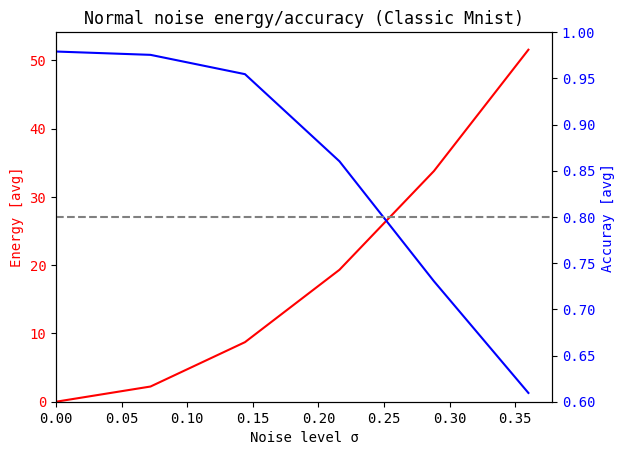

In [86]:
plt.figure()

ax1 = plt.subplots()[1]
ax2 = ax1.twinx()

# X / Y1
ax1.set_title('Normal noise energy/accuracy (Classic Mnist)')
ax1.set_xlabel('Noise level σ')
ax1.set_ylabel('Energy [avg]', color='red')
ax1.plot(noise_x, noise_y1, color='red')
ax1.tick_params(axis ='y', labelcolor='red')
ax1.set_xlim(0)
ax1.set_ylim(0)

# X / Y2
ax2.set_ylabel('Accuray [avg]', color='blue')
ax2.plot(noise_x, noise_y2, color='blue')
ax2.tick_params(axis ='y', labelcolor='blue')
ax2.hlines(y=0.8, xmin=0, xmax=1, linestyle='--', color='gray')
ax2.set_ylim(0.6, 1)

plt.show()

# Test :: Fashion MNIST

## Datasets

In [87]:
( (p_images, p_labels),
  (q_images, q_labels), ) = tf.keras.datasets.fashion_mnist.load_data()

# normalize
p_images = p_images / 255.0
q_images = q_images / 255.0

## Model

In [88]:
model = tf.keras.models.load_model('../models/fashion_mnist.keras')

## Visualize

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9218 - loss: 0.2249
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9123 - loss: 0.2436
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8798 - loss: 0.3305
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8022 - loss: 0.5347
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7002 - loss: 0.8290
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6033 - loss: 1.1244
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


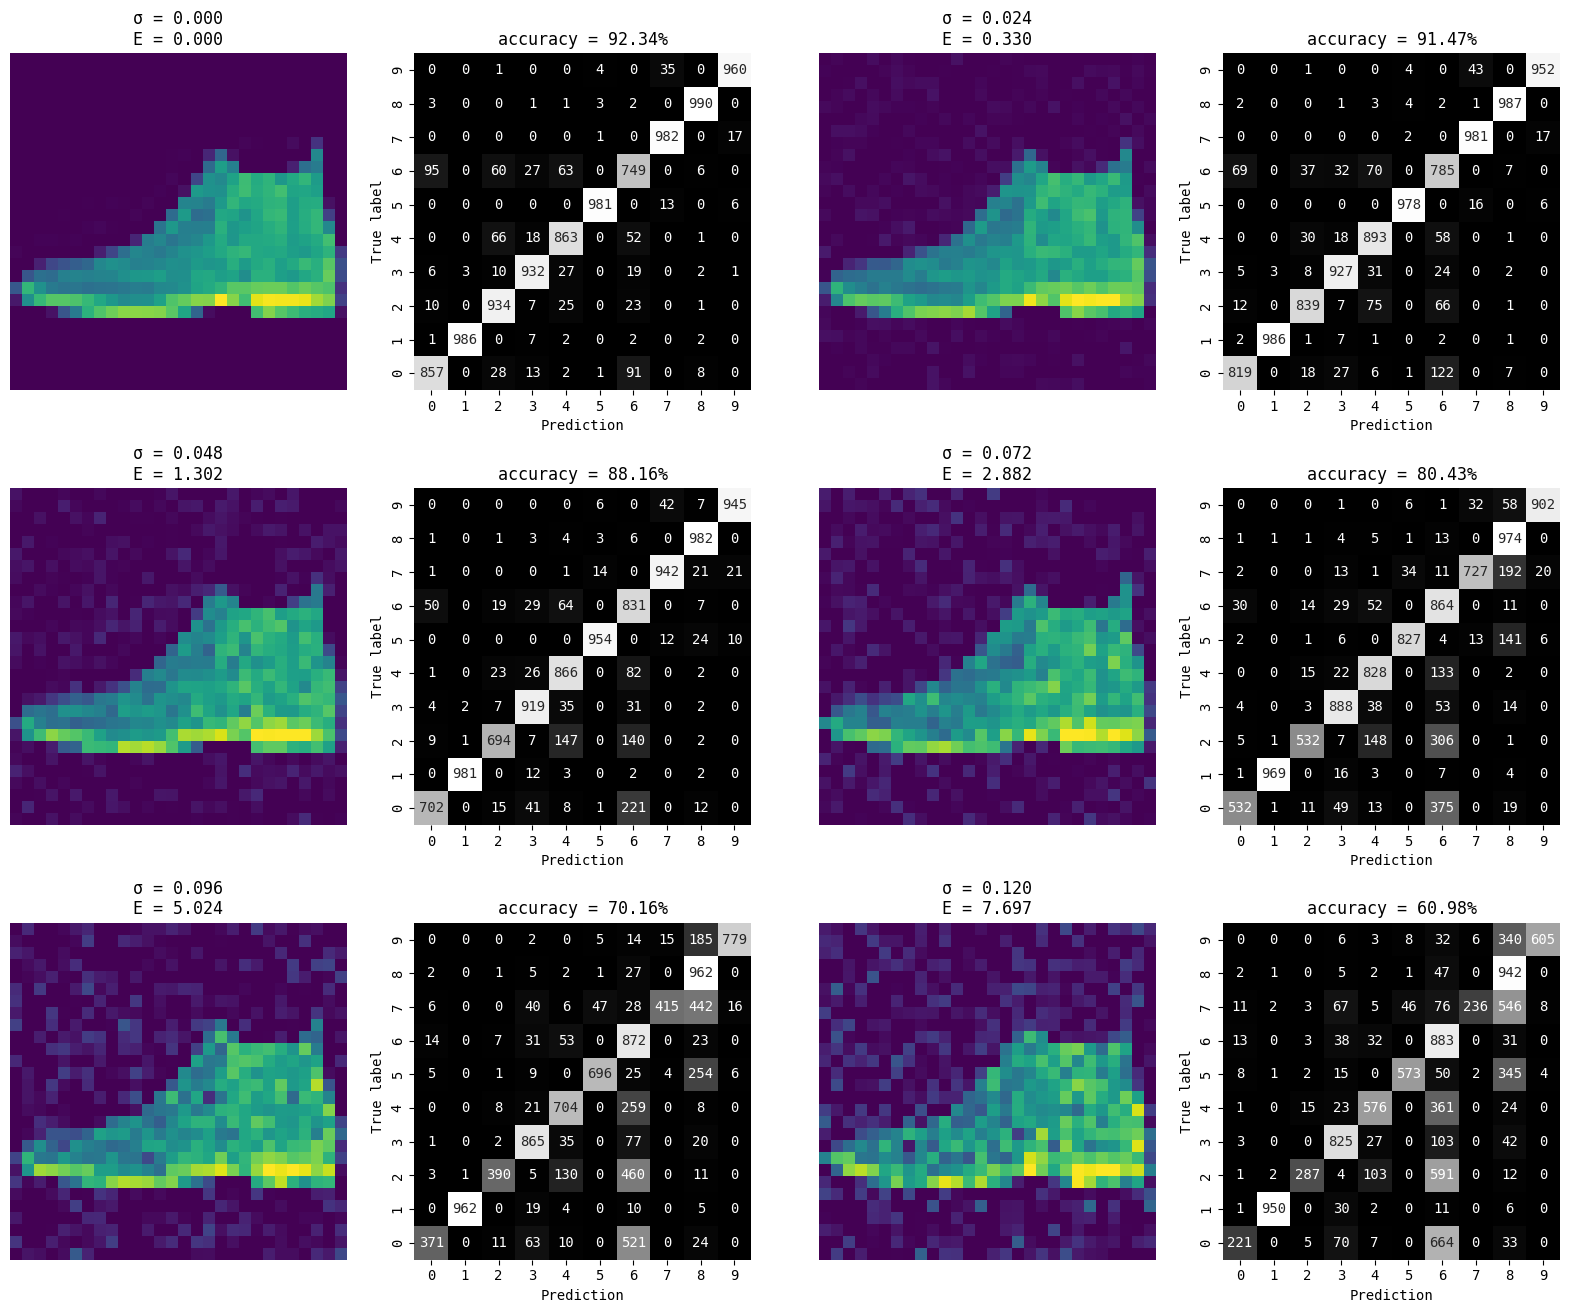

In [89]:
plt.figure(figsize=(20, 16))

noise_x = []
noise_y1 = []
noise_y2 = []

i = 0

for noise_lvl in np.linspace(0, .12, num=6):
    q_noised = layers.NormalNoiseLayer(mean=0, stddev=noise_lvl)(q_images)
    
    # evaluation
    noise_acc = model.evaluate(q_noised, q_labels)[1]
    noise_ene = ((q_images - q_noised) ** 2).numpy().sum() / q_images.shape[0]

    # prediction & confusion
    q_pred = model.predict(q_noised).argmax(-1)
    q_conf = tf.math.confusion_matrix(q_labels, q_pred)
    
    # statistics
    noise_x.append(noise_lvl)
    noise_y1.append(noise_ene)
    noise_y2.append(noise_acc)

    # visualize distorted image
    plt.subplot(3, 4, i + 1)
    plt.axis('off')
    plt.title(f'σ = {noise_lvl:.3f}\nΕ = {noise_ene:.3f}')
    plt.imshow(q_noised[0])

    # visualize confusion matrix
    plt.subplot(3, 4, i + 2)
    sn.heatmap(pd.DataFrame(q_conf), annot=True, cbar=False, cmap='gist_gray', fmt='g', square=True).invert_yaxis()
    plt.title(f'accuracy = {noise_acc:.2%}')
    plt.xlabel('Prediction')
    plt.ylabel('True label')
    
    # increment
    i = i + 2

plt.show()

## Conceive

<Figure size 640x480 with 0 Axes>

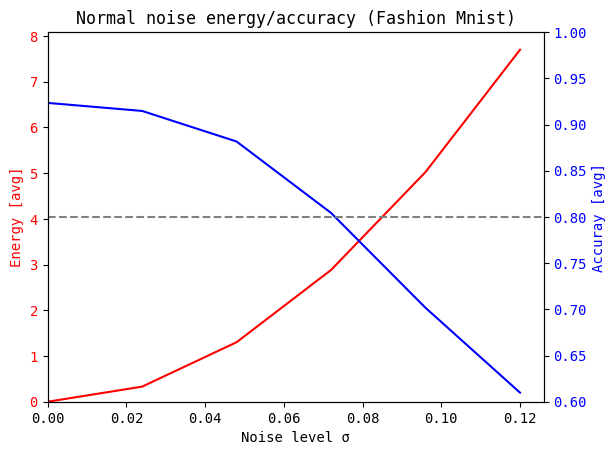

In [90]:
plt.figure()

ax1 = plt.subplots()[1]
ax2 = ax1.twinx()

# X / Y1
ax1.set_title('Normal noise energy/accuracy (Fashion Mnist)')
ax1.set_xlabel('Noise level σ')
ax1.set_ylabel('Energy [avg]', color='red')
ax1.plot(noise_x, noise_y1, color='red')
ax1.tick_params(axis ='y', labelcolor='red')
ax1.set_xlim(0)
ax1.set_ylim(0)

# X / Y2
ax2.set_ylabel('Accuray [avg]', color='blue')
ax2.plot(noise_x, noise_y2, color='blue')
ax2.tick_params(axis ='y', labelcolor='blue')
ax2.hlines(y=0.8, xmin=0, xmax=1, linestyle='--', color='gray')
ax2.set_ylim(0.6, 1)

plt.show()